In [1]:
import pandas as pd
df = pd.read_csv('csv - 2000-2009 Movies Box Ofice Collection.csv')

In [2]:
table = df.copy()

In [3]:
table

Unnamed: 0                                   Release Group  \
0              0                          Mission: Impossible II   
1              1                                       Gladiator   
2              2                                       Cast Away   
3              3                                 What Women Want   
4              4                                        Dinosaur   
...          ...                                             ...   
1995         195  Kamen Rider Decade: All Riders vs. Dai0Shocker   
1996         196                                          Ballad   
1997         197                                The White Ribbon   
1998         198                                        Cell 211   
1999         199                                     Taras Bulba   

         Worldwide      Domestic Domestic_percent       Foreign  \
0     54,63,88,108  21,54,09,889           39.40%  33,09,78,219   
1     46,05,83,960  18,77,05,427           40.80%  27,28,78,533   
2     42,96,32,142  23,36,32,142           54.40%  19,60,00,000   
3     37,41,11,707  18,28,11,707           48.90%  19,13,00,000   
4     34,98,22,765  13,77,48,063           39.40%  21,20,74,702   
...            ...           ...              ...           ...   
1995   1,94,18,091             0                0   1,94,18,091   
1996   1,93,28,678             0                0   1,93,28,678   
1997   1,93,19,671     22,22,862           11.50%   1,70,96,809   
1998   1,93,00,483             0                0   1,93,00,483   
1999   1,88,74,808             0                0   1,88,74,808   

     Foreign_percent  year  
0             60.60%  2000  
1             59.20%  2000  
2             45.60%  2000  
3             51.10%  2000  
4             60.60%  2000  
...              ...   ...  
1995            100%  2009  
1996            100%  2009  
1997          88.50%  2009  
1998            100%  2009  
1999            100%  2009  

[2000 rows x 8 columns]

In [4]:
type(table)

pandas.core.frame.DataFrame

In [5]:
movietitles = table['Release Group']
movietitles

0                               Mission: Impossible II
1                                            Gladiator
2                                            Cast Away
3                                      What Women Want
4                                             Dinosaur
                             ...                      
1995    Kamen Rider Decade: All Riders vs. Dai0Shocker
1996                                            Ballad
1997                                  The White Ribbon
1998                                          Cell 211
1999                                       Taras Bulba
Name: Release Group, Length: 2000, dtype: object

In [6]:
#after a quick eye-balling of the 00-09 data there are 2 glaring 'Release Group' issues: All '-' are subtituted by/
#'0' and some titles have the form of '#########'.

In [7]:
import re

In [8]:
valid_pattern = re.compile(r"^[A-Za-z\s']+$")

In [9]:
invalid_titles = []

for title in movietitles:
    if not valid_pattern.match(title):
        invalid_titles.append(title)

In [10]:
invalid_titles

['Mission: Impossible II',
 'X0Men',
 'Gone in 60 Seconds',
 'Crouching Tiger, Hidden Dragon',
 '102 Dalmatians',
 'Nutty Professor II: The Klumps',
 'Scream 3',
 'Me, Myself & Irene',
 'Pokémon the Movie 2000',
 'U0571',
 "The Exorcist 2000 Director's Cut",
 'The 6th Day',
 'Fantasia 2000',
 "Dude, Where's My Car?",
 'O Brother, Where Art Thou?',
 '28 Days',
 'Taxi 2',
 'Book of Shadows: Blair Witch 2',
 'Dracula 2000',
 'Urban Legends: Final Cut',
 'Titan A.E.',
 'The Adventures of Rocky & Bullwinkle',
 'Dungeons & Dragons',
 'Love & Basketball',
 'Cirque du Soleil: Journey of Man',
 'Dr. T & the Women',
 'Digimon: The Movie',
 'Highlander: Endgame',
 'What Planet Are You From?',
 'Godzilla 2000',
 '3 Strikes',
 'Ghost Dog: The Way of the Samurai',
 'Widow of St. Pierre',
 'Black & White',
 'Otto 0 Der Katastrofenfilm',
 'The Jungle Book 2000 Re0release',
 'Erkan & Stefan',
 'Pettson & Findus 0 Katten och gubbens år',
 'East/West',
 'Blood Simple 2000 Re0release',
 'The Broken Hearts

In [11]:
def replace_zeros(r):
    r = re.sub(r'(?<=[A-Za-z])0(?=[A-Za-z])', '-', r)
    
    r = re.sub(r'(?<=\s)0(?=\s)', '-', r)
    
    return r

In [12]:
movietitles = movietitles.apply(replace_zeros)

In [13]:
movietitles

0                               Mission: Impossible II
1                                            Gladiator
2                                            Cast Away
3                                      What Women Want
4                                             Dinosaur
                             ...                      
1995    Kamen Rider Decade: All Riders vs. Dai-Shocker
1996                                            Ballad
1997                                  The White Ribbon
1998                                          Cell 211
1999                                       Taras Bulba
Name: Release Group, Length: 2000, dtype: object

In [14]:
valid_pattern2 = re.compile(r"^[A-Za-z\s'&:,.?-]+$")

invalid_titles2 = [] 

for x in movietitles:
    if not valid_pattern2.match(x):
        invalid_titles2.append(x)

In [15]:
invalid_titles2

['Gone in 60 Seconds',
 '102 Dalmatians',
 'Scream 3',
 'Pokémon the Movie 2000',
 'U0571',
 "The Exorcist 2000 Director's Cut",
 'The 6th Day',
 'Fantasia 2000',
 '28 Days',
 'Taxi 2',
 'Book of Shadows: Blair Witch 2',
 'Dracula 2000',
 'Godzilla 2000',
 '3 Strikes',
 'The Jungle Book 2000 Re-release',
 'Pettson & Findus - Katten och gubbens år',
 'East/West',
 'Blood Simple 2000 Re-release',
 'Rush Hour 2',
 'American Pie 2',
 'Moulin Rouge!',
 'Dr. Dolittle 2',
 'Amélie',
 'Scary Movie 2',
 'Thir13en Ghosts',
 'Pokémon 3 the Movie: Spell of the Unown',
 '15 Minutes',
 'Beauty and the Beast 2000 IMAX Release',
 'Himalaya 2001 Re-release',
 'Crazy/Beautiful',
 '3000 Miles to Graceland',
 'Enigma 2001 Re-release',
 'Formula 51',
 'Sex and Lucía',
 'Megiddo: The Omega Code 2',
 '8 Mile',
 'The Santa Clause 2',
 'Stuart Little 2',
 'Space Station 3D',
 'Spy Kids 2: Island of Lost Dreams',
 '40 Days and 40 Nights',
 '28 Days Later',
 'E.T. the Extra-Terrestrial 20th Anniversary',
 'K019:

In [16]:
#almost all titles are correct except for the below ones./
#They cant be handled with a general code so they must be corrected manually
#U0571
#K019: The Widowmaker
#S1m-ne
#The 400Year-Old Virgin
#Iznogoud0 Caliph Instead of the Caliph
################################################################################################################################################################################################################################################################
#K020: The Fiend with Twenty Faces


In [17]:
pd.set_option('display.max_rows', None)
movietitles

0                                  Mission: Impossible II
1                                               Gladiator
2                                               Cast Away
3                                         What Women Want
4                                                Dinosaur
5                          How the Grinch Stole Christmas
6                                        Meet the Parents
7                                       The Perfect Storm
8                                                   X-Men
9                                       What Lies Beneath
10                                            Scary Movie
11                                       Charlie's Angels
12                                        Erin Brockovich
13                                            Unbreakable
14                                     Gone in 60 Seconds
15                                            Chicken Run
16                                         Vertical Limit
17            

In [18]:
corrections = {
    "U0571": "U-571",
    "K019: The Widowmaker": "K-19: The Widowmaker",
    "S1m-ne": "S1m0ne",
    "The 400Year-Old Virgin": "The 40-Year-Old Virgin",
    "Iznogoud0 Caliph Instead of the Caliph": "Iznogoud- Caliph Instead of the Caliph",
    "###############################################################################################################################################################################################################################################################": "May 18",
    "K020: The Fiend with Twenty Faces": "K-20: The Fiend with Twenty Faces"
}

movietitles = movietitles.replace(corrections)

In [19]:
movietitles

0                                  Mission: Impossible II
1                                               Gladiator
2                                               Cast Away
3                                         What Women Want
4                                                Dinosaur
5                          How the Grinch Stole Christmas
6                                        Meet the Parents
7                                       The Perfect Storm
8                                                   X-Men
9                                       What Lies Beneath
10                                            Scary Movie
11                                       Charlie's Angels
12                                        Erin Brockovich
13                                            Unbreakable
14                                     Gone in 60 Seconds
15                                            Chicken Run
16                                         Vertical Limit
17            

In [20]:
table['Release Group'] = movietitles

In [21]:
table

Unnamed: 0                                      Release Group  \
0              0                             Mission: Impossible II   
1              1                                          Gladiator   
2              2                                          Cast Away   
3              3                                    What Women Want   
4              4                                           Dinosaur   
5              5                     How the Grinch Stole Christmas   
6              6                                   Meet the Parents   
7              7                                  The Perfect Storm   
8              8                                              X-Men   
9              9                                  What Lies Beneath   
10            10                                        Scary Movie   
11            11                                   Charlie's Angels   
12            12                                    Erin Brockovich   
13            13                                        Unbreakable   
14            14                                 Gone in 60 Seconds   
15            15                                        Chicken Run   
16            16                                     Vertical Limit   
17            17                                        The Patriot   
18            18                     Crouching Tiger, Hidden Dragon   
19            19                                  Miss Congeniality   
20            20                                            Traffic   
21            21                                         Hollow Man   
22            22                                     102 Dalmatians   
23            23                                  Big Momma's House   
24            24                           The Emperor's New Groove   
25            25                     Nutty Professor II: The Klumps   
26            26                                           Scream 3   
27            27                                           Chocolat   
28            28                                 Me, Myself & Irene   
29            29                                          The Beach   
30            30                                Remember the Titans   
31            31                             Pokémon the Movie 2000   
32            32                                      Space Cowboys   
33            33                                              U-571   
34            34                                     The Family Man   
35            35                                          Road Trip   
36            36                                        Coyote Ugly   
37            37                                  Final Destination   
38            38                   The Exorcist 2000 Director's Cut   
39            39                                    Mission to Mars   
40            40                                            The Kid   
41            41                                       Billy Elliot   
42            42                                              Shaft   
43            43                               The Whole Nine Yards   
44            44                                           The Cell   
45            45                                   Rugrats in Paris   
46            46                                      Shanghai Noon   
47            47                                   The Tigger Movie   
48            48                                        The 6th Day   
49            49                                     Romeo Must Die   
50            50                                      Fantasia 2000   
51            51                                 Autumn in New York   
52            52                                        Bring It On   
53            53                                          Bedazzled   
54            54                                             Snatch   
55            55              

In [22]:
#The only cleaning left is for the numbers to show properly

In [23]:
def clean_column(column):
    return column.str.replace(',', '').astype(float)

In [24]:
table['Worldwide'] = clean_column(table['Worldwide'])
table['Domestic'] = clean_column(table['Domestic'])
table['Foreign'] = clean_column(table['Foreign'])

In [25]:
table['Worldwide'] = table['Worldwide'].apply(lambda x: '{:,.0f}'.format(x))
table['Domestic'] = table['Domestic'].apply(lambda x: '{:,.0f}'.format(x))
table['Foreign'] = table['Foreign'].apply(lambda x: '{:,.0f}'.format(x))

In [26]:
table

Unnamed: 0                                      Release Group  \
0              0                             Mission: Impossible II   
1              1                                          Gladiator   
2              2                                          Cast Away   
3              3                                    What Women Want   
4              4                                           Dinosaur   
5              5                     How the Grinch Stole Christmas   
6              6                                   Meet the Parents   
7              7                                  The Perfect Storm   
8              8                                              X-Men   
9              9                                  What Lies Beneath   
10            10                                        Scary Movie   
11            11                                   Charlie's Angels   
12            12                                    Erin Brockovich   
13            13                                        Unbreakable   
14            14                                 Gone in 60 Seconds   
15            15                                        Chicken Run   
16            16                                     Vertical Limit   
17            17                                        The Patriot   
18            18                     Crouching Tiger, Hidden Dragon   
19            19                                  Miss Congeniality   
20            20                                            Traffic   
21            21                                         Hollow Man   
22            22                                     102 Dalmatians   
23            23                                  Big Momma's House   
24            24                           The Emperor's New Groove   
25            25                     Nutty Professor II: The Klumps   
26            26                                           Scream 3   
27            27                                           Chocolat   
28            28                                 Me, Myself & Irene   
29            29                                          The Beach   
30            30                                Remember the Titans   
31            31                             Pokémon the Movie 2000   
32            32                                      Space Cowboys   
33            33                                              U-571   
34            34                                     The Family Man   
35            35                                          Road Trip   
36            36                                        Coyote Ugly   
37            37                                  Final Destination   
38            38                   The Exorcist 2000 Director's Cut   
39            39                                    Mission to Mars   
40            40                                            The Kid   
41            41                                       Billy Elliot   
42            42                                              Shaft   
43            43                               The Whole Nine Yards   
44            44                                           The Cell   
45            45                                   Rugrats in Paris   
46            46                                      Shanghai Noon   
47            47                                   The Tigger Movie   
48            48                                        The 6th Day   
49            49                                     Romeo Must Die   
50            50                                      Fantasia 2000   
51            51                                 Autumn in New York   
52            52                                        Bring It On   
53            53                                          Bedazzled   
54            54                                             Snatch   
55            55              

In [27]:
#cleaning is done. Below follows the analysis:

In [28]:
top_10_worldwide = table.sort_values(by='Worldwide', ascending=False).head(10)

In [29]:
top_10_worldwide

Unnamed: 0                          Release Group    Worldwide  \
857           57                                Hellboy   99,318,987   
46            46                          Shanghai Noon   99,274,467   
1260          60                            Nacho Libre   99,255,460   
1052          52                                  Crash   98,410,061   
242           42                              Evolution   98,376,292   
1261          61                               Deep Sea   98,230,905   
655           55             Once Upon a Time in Mexico   98,096,026   
200            0  Harry Potter and the Sorcerer's Stone  974,755,371   
1053          53                      Are We There Yet?   97,918,663   
1454          54                             Fred Claus   97,838,349   

         Domestic Domestic_percent      Foreign Foreign_percent  year  
857    59,623,958              60%   39,695,029             40%  2004  
46     56,937,502           57.40%   42,336,965          42.60%  2000  
1260   80,197,993           80.80%   19,057,467          19.20%  2006  
1052   54,580,300           55.50%   43,829,761          44.50%  2005  
242    38,345,494              39%   60,030,798             61%  2001  
1261   46,412,757           47.20%   51,818,148          52.80%  2006  
655    56,359,780           57.50%   41,736,246          42.50%  2003  
200   317,575,550           32.60%  657,179,821          67.40%  2001  
1053   82,674,398           84.40%   15,244,265          15.60%  2005  
1454   72,006,777           73.60%   25,831,572          26.40%  2007

In [30]:
#as can be seen above, the column is treated as string and doesn't sort it numerically

In [31]:
#Thus I am creating a temporary column in order to remove commas to perform numerical analysis.

In [32]:
table['Worldwide_num'] = table['Worldwide'].str.replace(',', '').astype(float)
table['Domestic_num'] = table['Domestic'].str.replace(',', '').astype(float)
table['Foreign_num'] = table['Foreign'].str.replace(',', '').astype(float)

In [33]:
top_10 = table.sort_values(by='Worldwide_num', ascending=False).head(10)

In [34]:
table

Unnamed: 0                                      Release Group  \
0              0                             Mission: Impossible II   
1              1                                          Gladiator   
2              2                                          Cast Away   
3              3                                    What Women Want   
4              4                                           Dinosaur   
5              5                     How the Grinch Stole Christmas   
6              6                                   Meet the Parents   
7              7                                  The Perfect Storm   
8              8                                              X-Men   
9              9                                  What Lies Beneath   
10            10                                        Scary Movie   
11            11                                   Charlie's Angels   
12            12                                    Erin Brockovich   
13            13                                        Unbreakable   
14            14                                 Gone in 60 Seconds   
15            15                                        Chicken Run   
16            16                                     Vertical Limit   
17            17                                        The Patriot   
18            18                     Crouching Tiger, Hidden Dragon   
19            19                                  Miss Congeniality   
20            20                                            Traffic   
21            21                                         Hollow Man   
22            22                                     102 Dalmatians   
23            23                                  Big Momma's House   
24            24                           The Emperor's New Groove   
25            25                     Nutty Professor II: The Klumps   
26            26                                           Scream 3   
27            27                                           Chocolat   
28            28                                 Me, Myself & Irene   
29            29                                          The Beach   
30            30                                Remember the Titans   
31            31                             Pokémon the Movie 2000   
32            32                                      Space Cowboys   
33            33                                              U-571   
34            34                                     The Family Man   
35            35                                          Road Trip   
36            36                                        Coyote Ugly   
37            37                                  Final Destination   
38            38                   The Exorcist 2000 Director's Cut   
39            39                                    Mission to Mars   
40            40                                            The Kid   
41            41                                       Billy Elliot   
42            42                                              Shaft   
43            43                               The Whole Nine Yards   
44            44                                           The Cell   
45            45                                   Rugrats in Paris   
46            46                                      Shanghai Noon   
47            47                                   The Tigger Movie   
48            48                                        The 6th Day   
49            49                                     Romeo Must Die   
50            50                                      Fantasia 2000   
51            51                                 Autumn in New York   
52            52                                        Bring It On   
53            53                                          Bedazzled   
54            54                                             Snatch   
55            55              

In [35]:
top_10

Unnamed: 0                                  Release Group  \
1800           0                                         Avatar   
600            0  The Lord of the Rings: The Return of the King   
1200           0     Pirates of the Caribbean: Dead Man's Chest   
1600           0                                The Dark Knight   
200            0          Harry Potter and the Sorcerer's Stone   
1400           0       Pirates of the Caribbean: At World's End   
1401           1      Harry Potter and the Order of the Phoenix   
1801           1         Harry Potter and the Half-Blood Prince   
800            0                                        Shrek 2   
400            0          The Lord of the Rings: The Two Towers   

          Worldwide     Domestic Domestic_percent        Foreign  \
1800  2,743,577,587  749,766,139           27.30%  1,993,811,448   
600   1,140,703,091  377,027,325           33.10%    763,654,686   
1200  1,066,179,725  423,315,812           39.70%    642,863,913   
1600  1,003,845,358  533,345,358           53.10%    470,500,000   
200     974,755,371  317,575,550           32.60%    657,179,821   
1400    960,996,492  309,420,425           32.20%    651,576,067   
1401    941,934,579  292,004,738              31%    649,928,484   
1801    933,959,197  301,959,197           32.30%    632,000,000   
800     928,965,969  441,426,807           47.50%    487,534,523   
400     923,015,234  339,789,881           36.80%    583,225,353   

     Foreign_percent  year  Worldwide_num  Domestic_num   Foreign_num  
1800          72.70%  2009   2.743578e+09   749766139.0  1.993811e+09  
600           66.90%  2003   1.140703e+09   377027325.0  7.636547e+08  
1200          60.30%  2006   1.066180e+09   423315812.0  6.428639e+08  
1600          46.90%  2008   1.003845e+09   533345358.0  4.705000e+08  
200           67.40%  2001   9.747554e+08   317575550.0  6.571798e+08  
1400          67.80%  2007   9.609965e+08   309420425.0  6.515761e+08  
1401             69%  2007   9.419346e+08   292004738.0  6.499285e+08  
1801          67.70%  2009   9.339592e+08   301959197.0  6.320000e+08  
800           52.50%  2004   9.289660e+08   441426807.0  4.875345e+08  
400           63.20%  2002   9.230152e+08   339789881.0  5.832254e+08

In [36]:
#and also the analysis of the percentages(Domestic to Foreign) of the big blockbusters:

In [37]:
#when trying to run the below command an error occurs because the percentages are treated as strings.
#table['Domestic_to_Foreign_ratio'] = table['Domestic_percent'] / table['Foreign_percent']

In [38]:
def clean_percent(value):
    if isinstance(value, str):
        value = value.replace('%', '')
        if '<' in value:
            value = value.replace('<', '')
        try:
            return float(value)
        except ValueError:
            return np.nan
    return value

table['Domestic_percent'] = table['Domestic_percent'].apply(clean_percent)
table['Foreign_percent'] = table['Foreign_percent'].apply(clean_percent)

table['Domestic_to_Foreign_ratio'] = table['Domestic_percent'] / table['Foreign_percent']

table[['Release Group', 'Domestic_percent', 'Foreign_percent', 'Domestic_to_Foreign_ratio']].head()

Release Group  Domestic_percent  Foreign_percent  \
0  Mission: Impossible II              39.4             60.6   
1               Gladiator              40.8             59.2   
2               Cast Away              54.4             45.6   
3         What Women Want              48.9             51.1   
4                Dinosaur              39.4             60.6   

   Domestic_to_Foreign_ratio  
0                   0.650165  
1                   0.689189  
2                   1.192982  
3                   0.956947  
4                   0.650165

In [39]:
top_20 = table.sort_values(by='Worldwide_num', ascending=False).head(20)

In [40]:
top_20

Unnamed: 0                                      Release Group  \
1800           0                                             Avatar   
600            0      The Lord of the Rings: The Return of the King   
1200           0         Pirates of the Caribbean: Dead Man's Chest   
1600           0                                    The Dark Knight   
200            0              Harry Potter and the Sorcerer's Stone   
1400           0           Pirates of the Caribbean: At World's End   
1401           1          Harry Potter and the Order of the Phoenix   
1801           1             Harry Potter and the Half-Blood Prince   
800            0                                            Shrek 2   
400            0              The Lord of the Rings: The Two Towers   
1000           0                Harry Potter and the Goblet of Fire   
1402           2                                       Spider-Man 3   
1802           2                     Ice Age: Dawn of the Dinosaurs   
401            1            Harry Potter and the Chamber of Secrets   
601            1                                       Finding Nemo   
201            1  The Lord of the Rings: The Fellowship of the Ring   
1001           1       Star Wars: Episode III - Revenge of the Sith   
1803           3                Transformers: Revenge of the Fallen   
402            2                                         Spider-Man   
1403           3                                    Shrek the Third   

          Worldwide     Domestic  Domestic_percent        Foreign  \
1800  2,743,577,587  749,766,139              27.3  1,993,811,448   
600   1,140,703,091  377,027,325              33.1    763,654,686   
1200  1,066,179,725  423,315,812              39.7    642,863,913   
1600  1,003,845,358  533,345,358              53.1    470,500,000   
200     974,755,371  317,575,550              32.6    657,179,821   
1400    960,996,492  309,420,425              32.2    651,576,067   
1401    941,934,579  292,004,738              31.0    649,928,484   
1801    933,959,197  301,959,197              32.3    632,000,000   
800     928,965,969  441,426,807              47.5    487,534,523   
400     923,015,234  339,789,881              36.8    583,225,353   
1000    895,921,036  290,013,036              32.4    605,908,000   
1402    894,983,373  336,530,303              37.6    558,453,070   
1802    886,686,817  196,573,705              22.2    690,113,112   
401     878,979,634  261,988,482              29.8    616,991,152   
601     871,014,978  339,714,978              39.0    531,300,000   
201     868,385,360  313,364,114              36.1    555,021,246   
1001    868,352,530  380,270,577              43.8    488,081,953   
1803    836,303,693  402,111,870              48.1    434,191,823   
402     821,708,551  403,706,375              49.1    418,002,176   
1403    813,367,380  322,719,944              39.7    490,647,436   

      Foreign_percent  year  Worldwide_num  Domestic_num   Foreign_num  \
1800             72.7  2009   2.743578e+09   749766139.0  1.993811e+09   
600              66.9  2003   1.140703e+09   377027325.0  7.636547e+08   
1200             60.3  2006   1.066180e+09   423315812.0  6.428639e+08   
1600             46.9  2008   1.003845e+09   533345358.0  4.705000e+08   
200              67.4  2001   9.747554e+08   317575550.0  6.571798e+08   
1400             67.8  2007   9.609965e+08   309420425.0  6.515761e+08   
1401             69.0  2007   9.419346e+08   292004738.0  6.499285e+08   
1801             67.7  2009   9.339592e+08   301959197.0  6.320000e+08   
800              52.5  2004   9.289660e+08   441426807.0  4.875345e+08   
400              63.2  2002   9.230152e+08   339789881.0  5.832254e+08   
1000             67.6  2005   8.959210e+08   290013036.0  6.059080e+08   
1402             62.4  2007   8.949834e+08   336530303.0  5.584531e+08   
1802             77.8  2009   8.866868e+08   196573705.0  6.901131e+08   
401              70.2  2002 

<Figure size 1200x600 with 0 Axes>

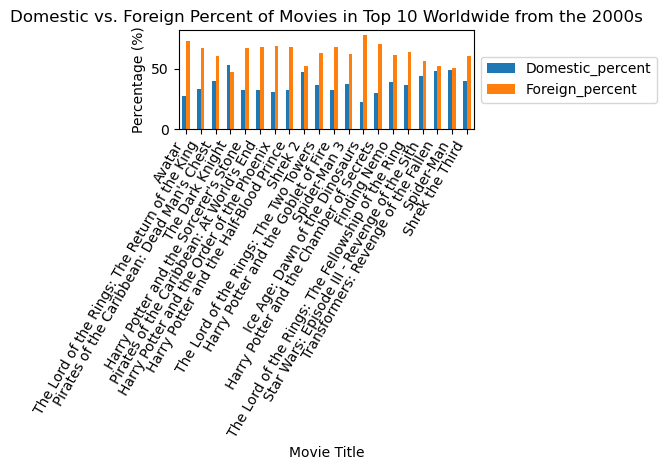

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

top_20[['Release Group', 'Domestic_percent', 'Foreign_percent']].set_index('Release Group').plot(kind='bar')

plt.title('Domestic vs. Foreign Percent of Movies in Top 10 Worldwide from the 2000s')
plt.xlabel('Movie Title')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=60, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()

In [42]:
#interestingly only one movie 'The Dark Knight' has higher Domestic_percent than Foreign.

In [43]:
table

Unnamed: 0                                      Release Group  \
0              0                             Mission: Impossible II   
1              1                                          Gladiator   
2              2                                          Cast Away   
3              3                                    What Women Want   
4              4                                           Dinosaur   
5              5                     How the Grinch Stole Christmas   
6              6                                   Meet the Parents   
7              7                                  The Perfect Storm   
8              8                                              X-Men   
9              9                                  What Lies Beneath   
10            10                                        Scary Movie   
11            11                                   Charlie's Angels   
12            12                                    Erin Brockovich   
13            13                                        Unbreakable   
14            14                                 Gone in 60 Seconds   
15            15                                        Chicken Run   
16            16                                     Vertical Limit   
17            17                                        The Patriot   
18            18                     Crouching Tiger, Hidden Dragon   
19            19                                  Miss Congeniality   
20            20                                            Traffic   
21            21                                         Hollow Man   
22            22                                     102 Dalmatians   
23            23                                  Big Momma's House   
24            24                           The Emperor's New Groove   
25            25                     Nutty Professor II: The Klumps   
26            26                                           Scream 3   
27            27                                           Chocolat   
28            28                                 Me, Myself & Irene   
29            29                                          The Beach   
30            30                                Remember the Titans   
31            31                             Pokémon the Movie 2000   
32            32                                      Space Cowboys   
33            33                                              U-571   
34            34                                     The Family Man   
35            35                                          Road Trip   
36            36                                        Coyote Ugly   
37            37                                  Final Destination   
38            38                   The Exorcist 2000 Director's Cut   
39            39                                    Mission to Mars   
40            40                                            The Kid   
41            41                                       Billy Elliot   
42            42                                              Shaft   
43            43                               The Whole Nine Yards   
44            44                                           The Cell   
45            45                                   Rugrats in Paris   
46            46                                      Shanghai Noon   
47            47                                   The Tigger Movie   
48            48                                        The 6th Day   
49            49                                     Romeo Must Die   
50            50                                      Fantasia 2000   
51            51                                 Autumn in New York   
52            52                                        Bring It On   
53            53                                          Bedazzled   
54            54                                             Snatch   
55            55              

In [44]:
table['Domestic_percent'] = table['Domestic_percent'].apply(lambda x: f'{x:.1f}%')
table['Foreign_percent'] = table['Foreign_percent'].apply(lambda x: f'{x:.1f}%')

table[['Release Group', 'Domestic_percent', 'Foreign_percent']].head()

Release Group Domestic_percent Foreign_percent
0  Mission: Impossible II            39.4%           60.6%
1               Gladiator            40.8%           59.2%
2               Cast Away            54.4%           45.6%
3         What Women Want            48.9%           51.1%
4                Dinosaur            39.4%           60.6%

In [45]:
table = table.drop(['Worldwide_num', 'Domestic_num', 'Foreign_num', 'Domestic_to_Foreign_ratio'], axis=1)

In [46]:
table

Unnamed: 0                                      Release Group  \
0              0                             Mission: Impossible II   
1              1                                          Gladiator   
2              2                                          Cast Away   
3              3                                    What Women Want   
4              4                                           Dinosaur   
5              5                     How the Grinch Stole Christmas   
6              6                                   Meet the Parents   
7              7                                  The Perfect Storm   
8              8                                              X-Men   
9              9                                  What Lies Beneath   
10            10                                        Scary Movie   
11            11                                   Charlie's Angels   
12            12                                    Erin Brockovich   
13            13                                        Unbreakable   
14            14                                 Gone in 60 Seconds   
15            15                                        Chicken Run   
16            16                                     Vertical Limit   
17            17                                        The Patriot   
18            18                     Crouching Tiger, Hidden Dragon   
19            19                                  Miss Congeniality   
20            20                                            Traffic   
21            21                                         Hollow Man   
22            22                                     102 Dalmatians   
23            23                                  Big Momma's House   
24            24                           The Emperor's New Groove   
25            25                     Nutty Professor II: The Klumps   
26            26                                           Scream 3   
27            27                                           Chocolat   
28            28                                 Me, Myself & Irene   
29            29                                          The Beach   
30            30                                Remember the Titans   
31            31                             Pokémon the Movie 2000   
32            32                                      Space Cowboys   
33            33                                              U-571   
34            34                                     The Family Man   
35            35                                          Road Trip   
36            36                                        Coyote Ugly   
37            37                                  Final Destination   
38            38                   The Exorcist 2000 Director's Cut   
39            39                                    Mission to Mars   
40            40                                            The Kid   
41            41                                       Billy Elliot   
42            42                                              Shaft   
43            43                               The Whole Nine Yards   
44            44                                           The Cell   
45            45                                   Rugrats in Paris   
46            46                                      Shanghai Noon   
47            47                                   The Tigger Movie   
48            48                                        The 6th Day   
49            49                                     Romeo Must Die   
50            50                                      Fantasia 2000   
51            51                                 Autumn in New York   
52            52                                        Bring It On   
53            53                                          Bedazzled   
54            54                                             Snatch   
55            55              